### Intruduction
German Credit Database,In this dataset each entry represents a person who takes a credit by a bank.
This dataset is a subset of the full dataset by Prof. Hofmann. Original dataset: UCI
“Statlog Dataset” from the UCI Machine Learning Repository


### Variables 
variable name                type
Age	                         Numeric(continuous)
Sex                          Catagorical
Job                          Catagorical
Housing	                     Catagorical                     
Saving accounts	             Catagorical
Checking account	         Catagorical
Credit amount	             numeric(continuous)
Duration	                 numeric(continuous)
Purpose                      Catagorical


In [49]:
### Improting libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### reading the dataset
df=pd.read_csv('german_credit_data (2) (1).csv')
df_original=df.copy()
df


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


The data set contains 1000 records and 10 fields 

Data preprocessing

In [3]:
### The column "Unnamed:0" as to be droped since it doesn't contain any useful information
df.drop('Unnamed: 0', inplace=True, axis=1)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [4]:
### In the Job column replacing the integers by discription
job_discription= {0:'unskilled and non-resident', 1:'unskilled and resident', 2:'skilled', 3:'higly skilled'}
df= df.replace({'Job':job_discription})
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,skilled,own,NaN,little,1169,6,radio/TV
1,22,female,skilled,own,little,moderate,5951,48,radio/TV
2,49,male,unskilled and resident,own,little,NaN,2096,12,education
3,45,male,skilled,free,little,little,7882,42,furniture/equipment
4,53,male,skilled,free,little,little,4870,24,car


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   object
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


After cleaning , data set contains 3 numeric and 6 catagorical data variables

In [14]:
df.describe()   ### statistical information

,Age,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


In [13]:
### checking for null values in percentage measure
df.isnull().sum()/df.shape[0] *100

Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving accounts     18.3
Checking account    39.4
Credit amount        0.0
Duration             0.0
Purpose              0.0
dtype: float64

the variables Saving and Checking account has significant percent of null values due to some reasons.

<AxesSubplot:xlabel='Age'>

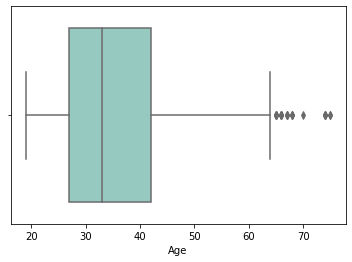

In [10]:
###checking for the outliers
sns.boxplot(x=df['Age'],palette='Set3')

<AxesSubplot:xlabel='Credit amount'>

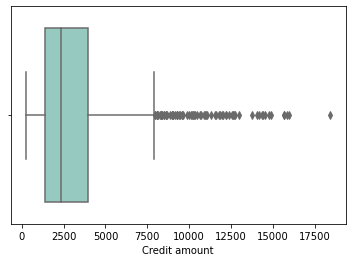

In [11]:
sns.boxplot(x=df['Credit amount'],palette='Set3')

<AxesSubplot:xlabel='Duration'>

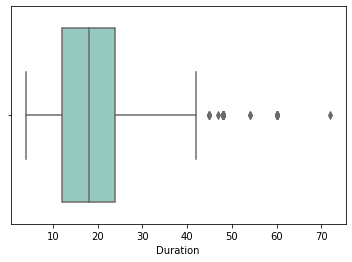

In [12]:
sns.boxplot(x=df['Duration'],palette='Set3')

In [ ]:
All numerical variables have outliers but credit amount has large number of outliers.

In [ ]:
### Data exploration of numeric data

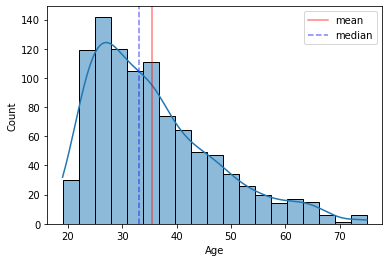

In [23]:
sns.histplot(data=df['Age'],kde=True)
plt.axvline(x=df.Age.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=df.Age.median(),color='blue',ls='--',alpha=0.5,label='median')
plt.legend()

The distribution data is positively skewed 
And the age group between 25-30 count is high

<AxesSubplot:xlabel='Credit amount', ylabel='Count'>

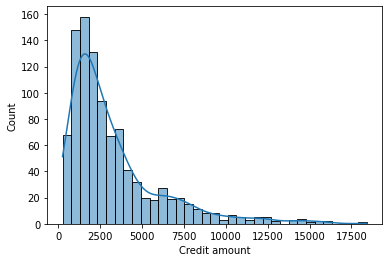

In [20]:
sns.histplot(data=df['Credit amount'],kde=True)


The data positively skewed and more coustomers are taking credit amount between 1000 to 2500

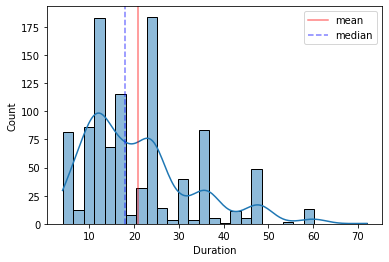

In [41]:
sns.histplot(data=df['Duration'],kde=True)
plt.axvline(x=df.Duration.mean(),color='red',alpha=0.5,label='mean')
plt.axvline(x=df.Duration.median(),color='blue',ls='--',alpha=0.5,label='median')
plt.legend()

The maximum coustemers are prefering duration for 1 to 2 years 

In [ ]:
### categorical variables

<AxesSubplot:xlabel='Sex', ylabel='count'>

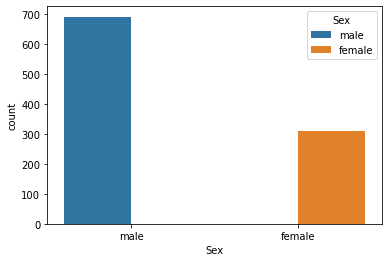

In [35]:
sns.countplot(x='Sex',hue='Sex',data=df)

Males have applied more for credit card than females.

<AxesSubplot:xlabel='Job', ylabel='count'>

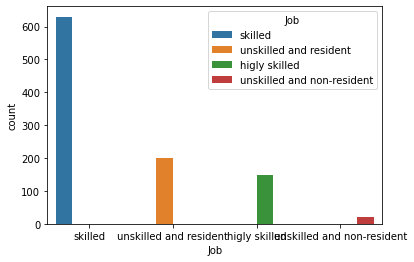

In [36]:
sns.countplot(x='Job',hue='Job',data=df,)

Skilled employes had more number of applications.

<AxesSubplot:xlabel='Housing', ylabel='count'>

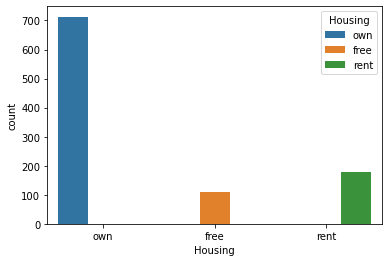

In [37]:
sns.countplot(x='Housing',hue='Housing',data=df)

people having own house have applied more for credit

<AxesSubplot:xlabel='Saving accounts', ylabel='count'>

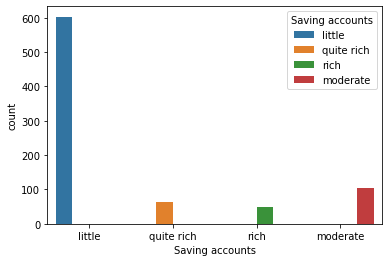

In [38]:
sns.countplot(x='Saving accounts',hue='Saving accounts',data=df)

people with less savings have applied more for credit.

<AxesSubplot:xlabel='Checking account', ylabel='count'>

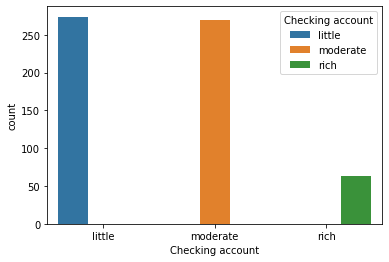

In [39]:
sns.countplot(x='Checking account',hue='Checking account',data=df)

<AxesSubplot:xlabel='Purpose', ylabel='count'>

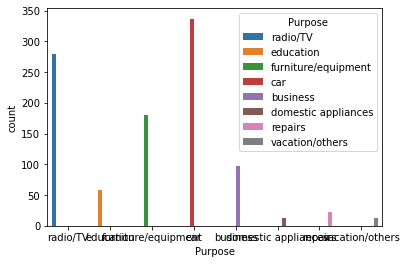

In [48]:
sns.countplot(x='Purpose',hue='Purpose',data=df)

people are taking credit to buy car&radio/TV are more and also on furnitutre/equipment.

In [ ]:
### comparing numarical vs catedorical to get some basic insights.

<AxesSubplot:xlabel='Sex'>

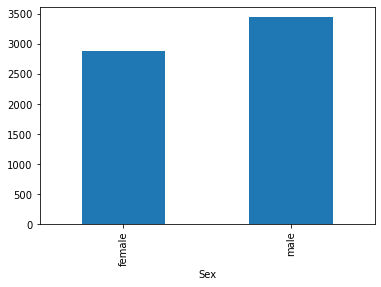

In [52]:
df.groupby('Sex')['Credit amount'].mean().T.plot(kind='bar')

males are taking more cerdit than females.

<AxesSubplot:xlabel='Job'>

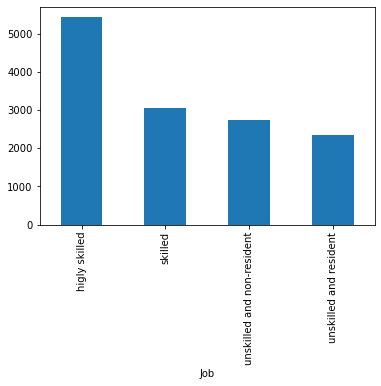

In [55]:
df.groupby('Job')['Credit amount'].mean().T.plot(kind='bar')

In [ ]:
Highly skilled people are getting more credit amount.